# A More Complex Problem

*This notebook first appeared as a part of [GHBD](https://github.com/wildtreetech/ghbd).*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; display: inline" src="https://i.creativecommons.org/l/by-nc-sa/4.0/80x15.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geneva's Humanitarian Big Data</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/wildtreetech/ghbd" property="cc:attributionName" rel="cc:attributionURL">Tim Head</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

*(C) 2016, Tim Head.*
*Feel free to use, distribute, and modify with the above attribution.*

In this example we will use a public dataset of mobile
phone customers. The challenge is: can we predict whether
or not a customer will switch providers?

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [3]:
churn_df = pd.read_csv('data/churn.csv')

In [4]:
churn_df.head().T

,0,1,2,3,4
State,KS,OH,NJ,OH,OK
Account Length,128,107,137,84,75
Area Code,415,415,415,408,415
Phone,382-4657,371-7191,358-1921,375-9999,330-6626
Int'l Plan,no,no,no,yes,yes
VMail Plan,yes,yes,no,no,no
VMail Message,25,26,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7
Day Calls,110,123,114,71,113
Day Charge,45.07,27.47,41.38,50.9,28.34


In [5]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [6]:
y = np.where(churn_df['Churn?'] == 'True.', 1, 0)
print('Fraction of users leaving:', y.mean())

Fraction of users leaving: 0.144914491449


Remove some columns that should not form part of the prediction.
For example the phone number or area code should not be in any
way predictive of whether or not a user remains.

In [7]:
to_drop = ['State', 'Area Code', 'Phone', 'Churn?']
churn_features = churn_df.drop(to_drop, axis=1)

Columns containing text (like `'yes'` or `'no'`) need to be converted
to a boolean values (`True` or `False`).

In [8]:
yes_no_columns = ["Int'l Plan", "VMail Plan"]
churn_features[yes_no_columns] = churn_features[yes_no_columns] == 'yes'

In [9]:
churn_features.head().T

,0,1,2,3,4
Account Length,128,107,137,84,75
Int'l Plan,False,False,False,True,True
VMail Plan,True,True,False,False,False
VMail Message,25,26,0,0,0
Day Mins,265.1,161.6,243.4,299.4,166.7
Day Calls,110,123,114,71,113
Day Charge,45.07,27.47,41.38,50.9,28.34
Eve Mins,197.4,195.5,121.2,61.9,148.3
Eve Calls,99,103,110,88,122
Eve Charge,16.78,16.62,10.3,5.26,12.61


In [10]:
# convert everything to numerical values
X = churn_features.as_matrix().astype(np.float)

# Let the learning begin

After these preparatory steps, that often take a lot more
time and care, let's get started with building models
that can predict whether or not a user will remain with
the mobile phone company.

## Measuring performance

(Quoting from [scikit-learn documentation](http://scikit-learn.org/dev/modules/cross_validation.html))

Learning the parameters of a prediction function and testing it on the same
data is a methodological mistake: a model that would just repeat the labels
of the samples that it has just seen would have a perfect score but would
fail to predict anything useful on yet-unseen data. This situation is called
overfitting. To avoid it, it is common practice when performing a machine
learning experiment to hold out part of the available data as a test
set `X_test, y_test`.

<img src="img/cross-validation.png" />

In [11]:
from sklearn.cross_validation import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier


classifiers = [('Dummy', DummyClassifier(strategy='most_frequent')),
               ('RF', RandomForestClassifier()),
               ('kNN', KNeighborsClassifier())]

In [12]:
for name,classifier in classifiers:
    scores = cross_val_score(classifier, X, y, scoring='accuracy')
    print(name, 'scores:', scores)

Dummy scores: [ 0.85508551  0.85508551  0.85508551]
RF scores: [ 0.9279928   0.94419442  0.94329433]
kNN scores: [ 0.87578758  0.88478848  0.87128713]


# Accuracy is not the only yardstick

As you can see even a model that always predicts that
a user will remain achieves na accuracy of 85%. There
might also be different costs associated with making
different mistakes. Compare:

* Predicting that a customer will remain and getting it wrong
* predicting that a customer will leave and getting it wrong

We can get a more detailed look at the predictions by
looking at the confusion matrix:

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_predict
import matplotlib.pyplot as plt

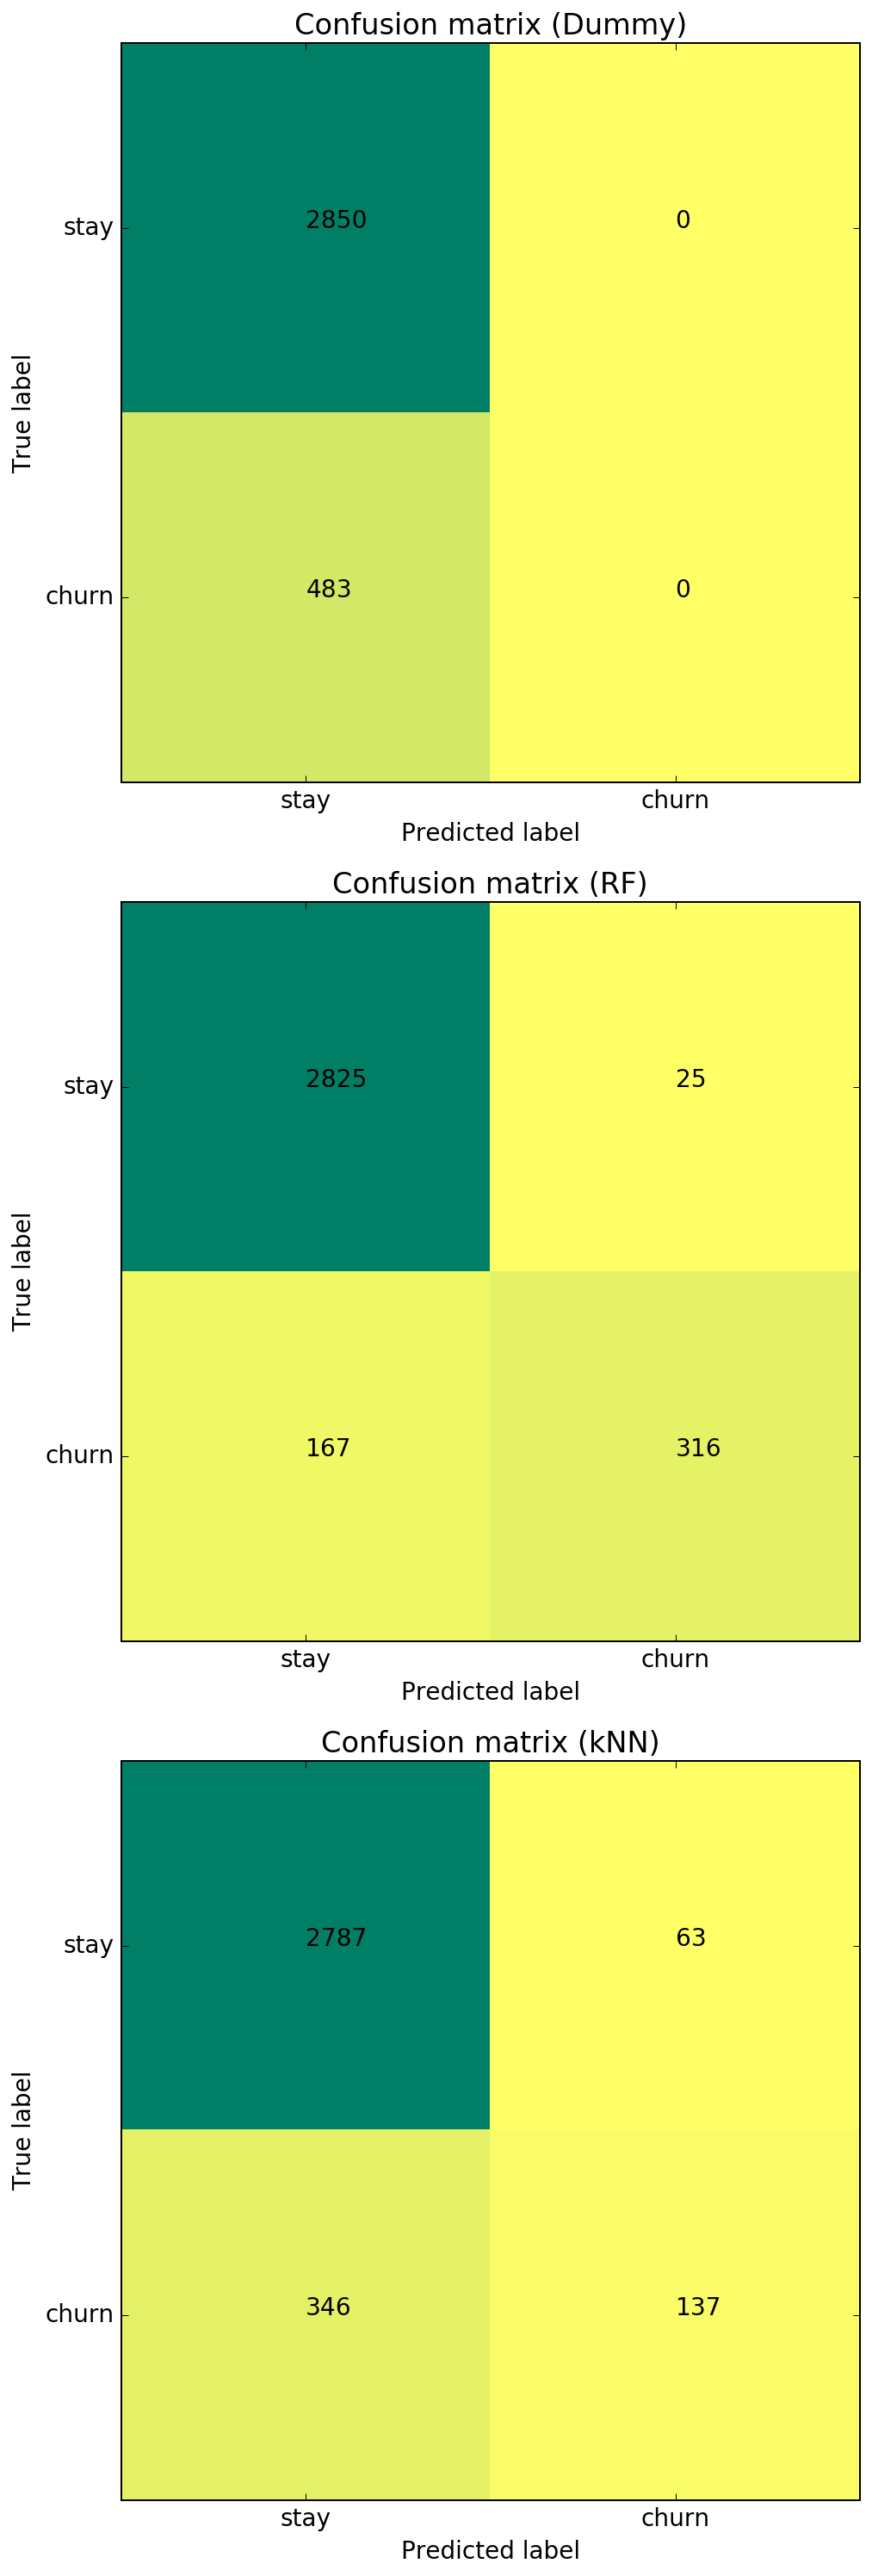

In [14]:
classifiers = [('Dummy', DummyClassifier(strategy='most_frequent')),
               ('RF', RandomForestClassifier()),
               ('kNN', KNeighborsClassifier())]

def plot_confusion_matrix(cm, ax, title='Confusion matrix', cmap=plt.cm.summer_r):
    ax.imshow(cm, interpolation='none', cmap=cmap)

    ax.set_xticks([0,1])
    ax.set_yticks([0,1])

    ax.set_xticklabels(['stay', 'churn'])
    ax.set_yticklabels(['stay', 'churn'])

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.annotate(str(cm[i][j]), xy=(j, i), color='black')

    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_title(title)


fig, axarr = plt.subplots(nrows=len(classifiers), figsize=(7, 7*len(classifiers)))

for (name,classifier), ax in zip(classifiers, axarr):
    y_pred = cross_val_predict(classifier, X, y)
    plot_confusion_matrix(confusion_matrix(y, y_pred), ax,
                          'Confusion matrix (%s)'%name)
    
plt.tight_layout()

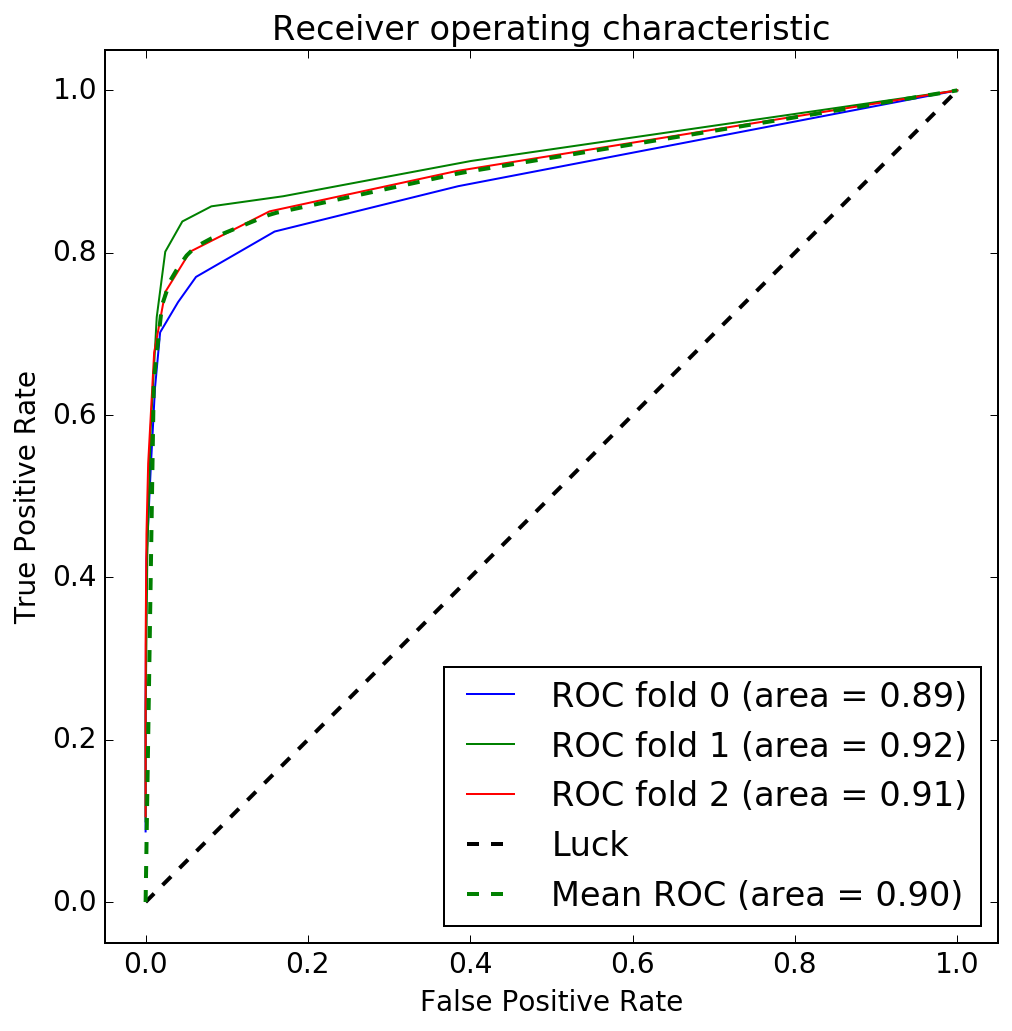

In [15]:
from sklearn.cross_validation import StratifiedKFold
from utils import draw_roc_curve

clf = RandomForestClassifier()
#clf = RandomForestClassifier(n_estimators=30)
#clf = RandomForestClassifier(max_depth=5)
cv = StratifiedKFold(y, n_folds=3)
    
draw_roc_curve(clf, cv, X, y)

# Things to remember

* what is the baseline you are comparing to? How well would you do with a dummy classifier?
* cross-validation: keep data in reserve in order to evaluate the performance of your model
* accuracy is not the be all, end all
* can tune the false positive and false negative rate depending on what is important to you